In [4]:
import pandas as pd
df=pd.read_csv('Credit.csv')
df.head()

,Credit,RevolvingUtiOfUnsecuredLines,age,NoofTime30_59DaysPastDue,DebtRatio,MonthlyIncome,NoOfOpenCreditLinesAndLoans,NorOfTimes90DaysLate,NoRealEstateLoansOrLines,NoOfTime60_89DaysPastDue,NoOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


In [5]:
df.shape

(8026, 11)

In [2]:
from sklearn.linear_model import LogisticRegression

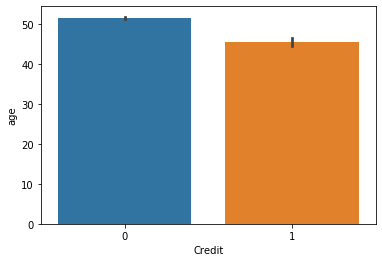

In [7]:
import seaborn as sns
sns.barplot(x=df.Credit,y=df.age)
#sns.histplot(data=df.age)

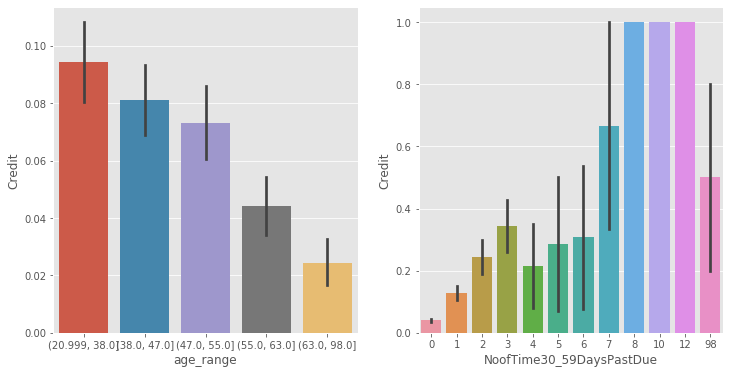

In [8]:
from matplotlib import pyplot as plt, style
style.use('ggplot')
df['age_range']=pd.qcut(df.age,q=5)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=df.age_range,y=df.Credit)
plt.subplot(1,2,2)
sns.barplot(x=df.NoofTime30_59DaysPastDue,y=df.Credit)
#people having high bar has bad credit

In [9]:
df2=pd.get_dummies(data=df,columns=['age_range'],drop_first=True)#creating dummies for age group

In [10]:
x=df2.loc[ : , df2.columns != 'Credit'] 
y=df2['Credit']

In [11]:
#Splitting  the data into train and test

from sklearn.model_selection import train_test_split

train_X,test_x,train_Y,test_y=train_test_split(x,y,random_state=0)

In [12]:
train_X.head()

,RevolvingUtiOfUnsecuredLines,age,NoofTime30_59DaysPastDue,DebtRatio,MonthlyIncome,NoOfOpenCreditLinesAndLoans,NorOfTimes90DaysLate,NoRealEstateLoansOrLines,NoOfTime60_89DaysPastDue,NoOfDependents,"age_range_(38.0, 47.0]","age_range_(47.0, 55.0]","age_range_(55.0, 63.0]","age_range_(63.0, 98.0]"
2434,0.088614,62,0,0.125719,4000,11,0,0,0,0,0,0,1,0
7436,0.540115,38,0,0.169709,11666,6,0,1,0,2,0,0,0,0
20,0.075427,32,0,0.085512,7916,6,0,0,0,0,0,0,0,0
5765,0.045773,28,0,0.201705,3400,7,0,0,0,2,0,0,0,0
2006,0.000867,83,0,0.000000,0,5,0,0,0,0,0,0,0,1


In [23]:
#creating estimator object for standardization
from sklearn.preprocessing import StandardScaler
stdSC=StandardScaler()
stdSC.fit(train_X)
train_new_X=pd.DataFrame(stdSC.transform(train_X))
#x_test_std=stdSC.transform(test_x)
#pd.DataFrame(stdScaler.transform(train_X))
#pd.DataFrame(stdScaler.transform(test_x))


In [24]:
print(train_new_X.shape)# it is divided into 75,25 % by default
print(test_x.shape)

(6019, 14)
(2007, 14)


In [28]:
from sklearn.linear_model import LogisticRegression

In [26]:
#create an estimator object
CreditModel=LogisticRegression(max_iter=1000)#max_iter=100 changed to max_iter=1000 to avoid the error

In [27]:
#fitting the model/training the model
CreditModel.fit(train_new_X,train_Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
CreditModel.coef_

array([[ 0.03193665, -0.26178876,  1.37392431, -0.21463191, -0.34819489,
        -0.11999672,  1.49100927,  0.17536834, -2.74564556,  0.05763634,
         0.01295823,  0.04760529, -0.04512287, -0.18533465]])

In [41]:
predic_y=CreditModel.predict(train_new_X)
predic_y.shape
train_X.shape

(6019, 14)

In [39]:
test_y.head(10)

4261    0
6345    0
779     0
541     1
4583    0
938     0
7725    0
3059    0
7141    0
3594    0
Name: Credit, dtype: int64

In [31]:
CreditModel.score(train_new_X,train_Y)# with scaling

0.9370327296893172

In [30]:
CreditModel.score(test_x,test_y) # withput scaling

0.931738913801694

In [43]:
pd.crosstab(train_Y,predic_y)# without scale

col_0,0,1
Credit,,
0,5633,6
1,373,7
